In [1]:
# Script to graph the number of TIME for ranked enumeration
## first scenario

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
import os

In [2]:
alg_label = ["R. LOUDS Backtrack.", 
             "R. LOUDS Op. Order",
             "R. DFUDS Backtrack.", 
             "R. DFUDS Op. Order"]

In [3]:
# List of query patterns
patterns = ["j3","j4","p2","p3","p4","s3","t2","t3","t4","ti2","ti3"]
# Initialize an empty NumPy array
number_res = np.array([])

In [4]:
for pattern in patterns:
    number_results_file = np.loadtxt(f'../../query1000results/original/{pattern}-k1-v1000-number-res.txt')

    # Ensure it's an array (in case it loads as a scalar)
    number_results_file = np.atleast_1d(number_results_file)

    # Concatenate instead of element-wise addition
    number_res = np.concatenate((number_res, number_results_file))

In [5]:
len(number_res) # eje x

51

In [6]:
# Dictionary to store data
data = {}
#data["original"] = np.array([])
data["rankedLoudsBack"] = np.array([])
data["rankedLoudsNon"] = np.array([])
data["rankedDfudsBack"] = np.array([])
data["rankedDfudsNon"] = np.array([])


for type_fun in [0]:#,1]:
    for k in [1]: 
        for i,query in enumerate(patterns): 
            file = f"{query}-f{type_fun}-k{k}-v1000-time.txt"
            file_original = f"{query}-k100000000-v1000-time.txt"
            
            original = np.loadtxt(f'../../query1000results/original/{file_original}', dtype=float)
            original = np.atleast_1d(original)
            original_size = original.shape[0]
            
            rankedLoudsBack = np.loadtxt(f'../../query1000results/ranked/louds/backtracking/{file}', dtype=float)
            rankedLoudsBack = np.atleast_1d(rankedLoudsBack)[:original_size]
        
            rankedLoudsNon = np.loadtxt(f'../../query1000results/ranked/louds/optimalOrder/{file}', dtype=float)
            rankedLoudsNon = np.atleast_1d(rankedLoudsNon)[:original_size]
            rankedDfudsBack = np.loadtxt(f'../../query1000results/ranked/dfuds/backtracking/{file}', dtype=float)
            rankedDfudsBack = np.atleast_1d(rankedDfudsBack)[:original_size]
            rankedDfudsNon = np.loadtxt(f'../../query1000results/ranked/dfuds/optimalOrder/{file}', dtype=float)
            rankedDfudsNon = np.atleast_1d(rankedDfudsNon)[:original_size]
            
            #data["original"]=np.concatenate((data["original"], original))
            data["rankedLoudsBack"] = np.concatenate((data["rankedLoudsBack"], rankedLoudsBack/original))
            data["rankedLoudsNon"] = np.concatenate((data["rankedLoudsNon"], rankedLoudsNon/original))
            data["rankedDfudsBack"] = np.concatenate((data["rankedDfudsBack"], rankedDfudsBack/original))
            data["rankedDfudsNon"] = np.concatenate((data["rankedDfudsNon"], rankedDfudsNon/original))
            
        

In [64]:
len(data["rankedDfudsBack"])

51

In [7]:
colors = {
    "rankedLoudsBack": "#4169E1",  # Royal Blue
    "rankedLoudsNon": "#DC143C",   # Crimson
    "rankedDfudsBack": "#FF8C00",  # Dark Orange
    "rankedDfudsNon": "#2E8B57"    # Sea Green
}

# # Daltonic-Friendly Colors
colors_daltonic = {
     "rankedLoudsBack": "#000080",  # Navy Blue
     "rankedLoudsNon": "#800080",   # Magenta
     "rankedDfudsBack": "#FFD700",  # Gold
     "rankedDfudsNon": "#008080"    # Teal
}

#'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime'
#colors = ['#de2d26','#7fcdbb', '#feb24c','#8856a7', '#fa9fb5']
colors = {
    "rankedLoudsBack": "#3182bd", 
    "rankedLoudsNon": "#d95f0e",   
    "rankedDfudsBack": "#dd1c77",  
    "rankedDfudsNon": "#31a354"  
}
#colors = ['#de2d26','#fec44f', '#31a354','#3182bd', '#c51b8a']

colors = {
    "rankedLoudsBack": "#fec44f", 
    "rankedLoudsNon": "#31a354",   
    "rankedDfudsBack": "#3182bd",  
    "rankedDfudsNon": "#c51b8a"  
}

labels = {
    "rankedLoudsBack": "Ranked Louds Backtracking",
    "rankedLoudsNon": "Ranked Louds Optimal Order",
    "rankedDfudsBack": "Ranked DFUDS Backtracking",
    "rankedDfudsNon": "Ranked DFUDS Optimal Order"
}

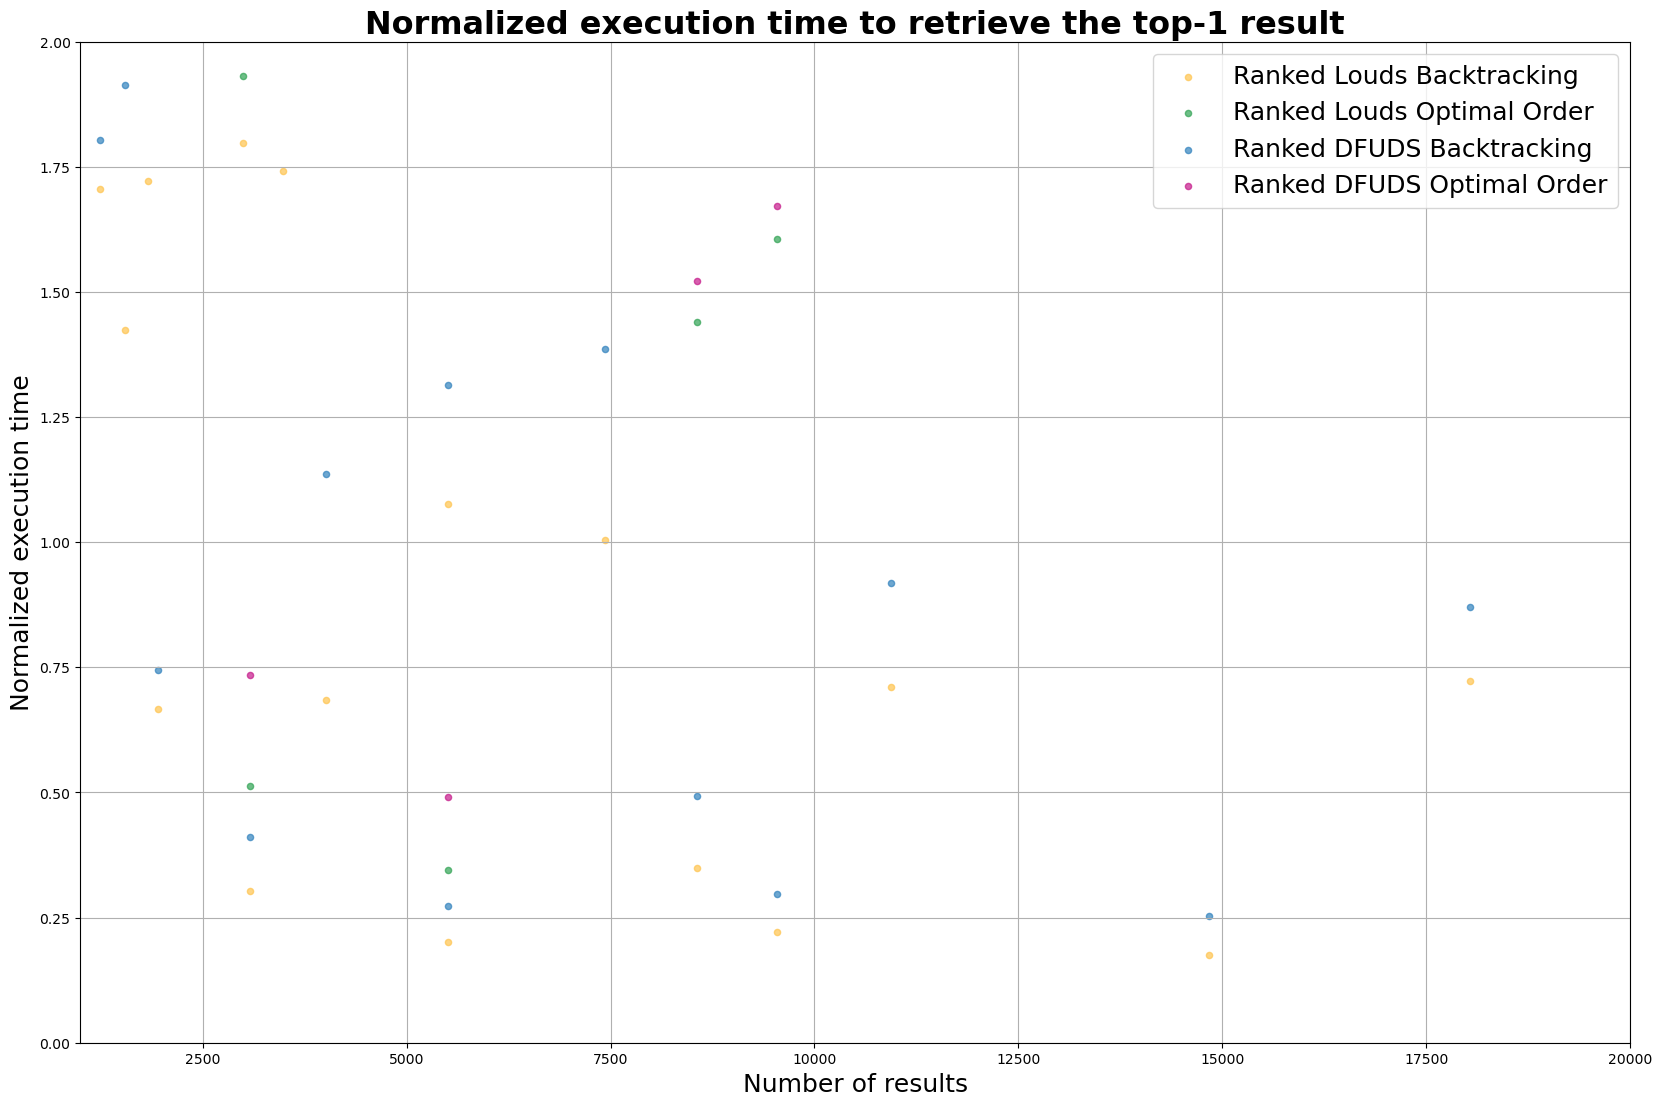

In [8]:
# Create the scatter plot
plt.figure(figsize=(20, 13))

# Plot each algorithm with its corresponding color
for algo, values in data.items():
    plt.scatter(number_res, values, label=labels[algo], color=colors[algo], alpha=0.7, s=20)

#plt.xlim(800,600000)
plt.xlim(1000,20000)
plt.ylim(0,2)
# Labels and title
plt.xlabel("Number of results",fontsize=18)
plt.ylabel("Normalized execution time",fontsize=18)
plt.title("Normalized execution time to retrieve the top-1 result",fontsize=23, fontweight='bold')
plt.legend(fontsize=18)
plt.grid(True)

#plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/scatter_plot_ranked-time.pdf')
plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/scatter_plot_ranked-time-zoom.pdf')

# Show the plot
plt.show()

In [9]:
## nodes
def load_hex_file(file_path):
    with open(file_path, 'r') as file:
        # Read lines, strip whitespace, and convert from hex to float
        return np.array([float.fromhex(line.strip()) for line in file])


In [10]:
# Dictionary to store data
data = {}
#data["original"] = np.array([])
data["rankedLoudsBack"] = np.array([])
data["rankedLoudsNon"] = np.array([])
data["rankedDfudsBack"] = np.array([])
data["rankedDfudsNon"] = np.array([])


for type_fun in [0]:#,1]:
    for k in [1]: 
        for i,query in enumerate(patterns): 
            #print(query)
            file = f"{query}-f{type_fun}-k{k}-v1000-nodes.txt"
            file_original = f"{query}-k100000000-v1000-nodes.txt"
            
            original = load_hex_file(f'../../query1000results/original/{file_original}')
            #print(original)

            #original = np.atleast_1d(original)
            
            rankedLoudsBack = load_hex_file(f'../../query1000results/ranked/louds/backtracking/{file}')
            #rankedLoudsBack = np.atleast_1d(rankedLoudsBack)
            rankedLoudsNon = load_hex_file(f'../../query1000results/ranked/louds/optimalOrder/{file}')
            #rankedLoudsNon = np.atleast_1d(rankedLoudsNon) 
            rankedDfudsBack = load_hex_file(f'../../query1000results/ranked/dfuds/backtracking/{file}')
            #print(rankedDfudsBack)
            #rankedDfudsBack = np.atleast_1d(rankedDfudsBack) 
            rankedDfudsNon = load_hex_file(f'../../query1000results/ranked/dfuds/optimalOrder/{file}')
            #rankedDfudsNon = np.atleast_1d(rankedDfudsNon) 
            
            if(len(rankedLoudsBack)!= len(rankedLoudsNon) != len(rankedDfudsBack) != len(rankedDfudsNon) != len(original)):
                print(query)
            
            #data["original"]=np.concatenate((data["original"], original))
            data["rankedLoudsBack"] = np.concatenate((data["rankedLoudsBack"], rankedLoudsBack/original))
            data["rankedLoudsNon"] = np.concatenate((data["rankedLoudsNon"], rankedLoudsNon/original))
            data["rankedDfudsBack"] = np.concatenate((data["rankedDfudsBack"], rankedDfudsBack/original))
            data["rankedDfudsNon"] = np.concatenate((data["rankedDfudsNon"], rankedDfudsNon/original))
            
        

In [70]:
len(data["rankedLoudsBack"])

51

In [11]:
colors = {
    "rankedLoudsBack": "#4169E1",  # Royal Blue
    "rankedLoudsNon": "#DC143C",   # Crimson
    "rankedDfudsBack": "#FF8C00",  # Dark Orange
    "rankedDfudsNon": "#2E8B57"    # Sea Green
}

# # Daltonic-Friendly Colors
colors_daltonic = {
     "rankedLoudsBack": "#000080",  # Navy Blue
     "rankedLoudsNon": "#800080",   # Magenta
     "rankedDfudsBack": "#FFD700",  # Gold
     "rankedDfudsNon": "#008080"    # Teal
}

colors = {
    "rankedLoudsBack": "dodgerblue", 
    "rankedLoudsNon": "darkturquoise",   
    "rankedDfudsBack": "mediumspringgreen",  
    "rankedDfudsNon": "lime"  
}
colors = {
    "rankedLoudsBack": "#3182bd", 
    "rankedLoudsNon": "#d95f0e",   
    "rankedDfudsBack": "#dd1c77",  
    "rankedDfudsNon": "#31a354"  
}

colors = {
    "rankedLoudsBack": "#fec44f", 
    "rankedLoudsNon": "#31a354",   
    "rankedDfudsBack": "#3182bd",  
    "rankedDfudsNon": "#c51b8a"  
}


labels = {
    "rankedLoudsBack": "Ranked Louds Backtracking",
    "rankedLoudsNon": "Ranked Louds Optimal Order",
    "rankedDfudsBack": "Ranked DFUDS Backtracking",
    "rankedDfudsNon": "Ranked DFUDS Optimal Order"
}

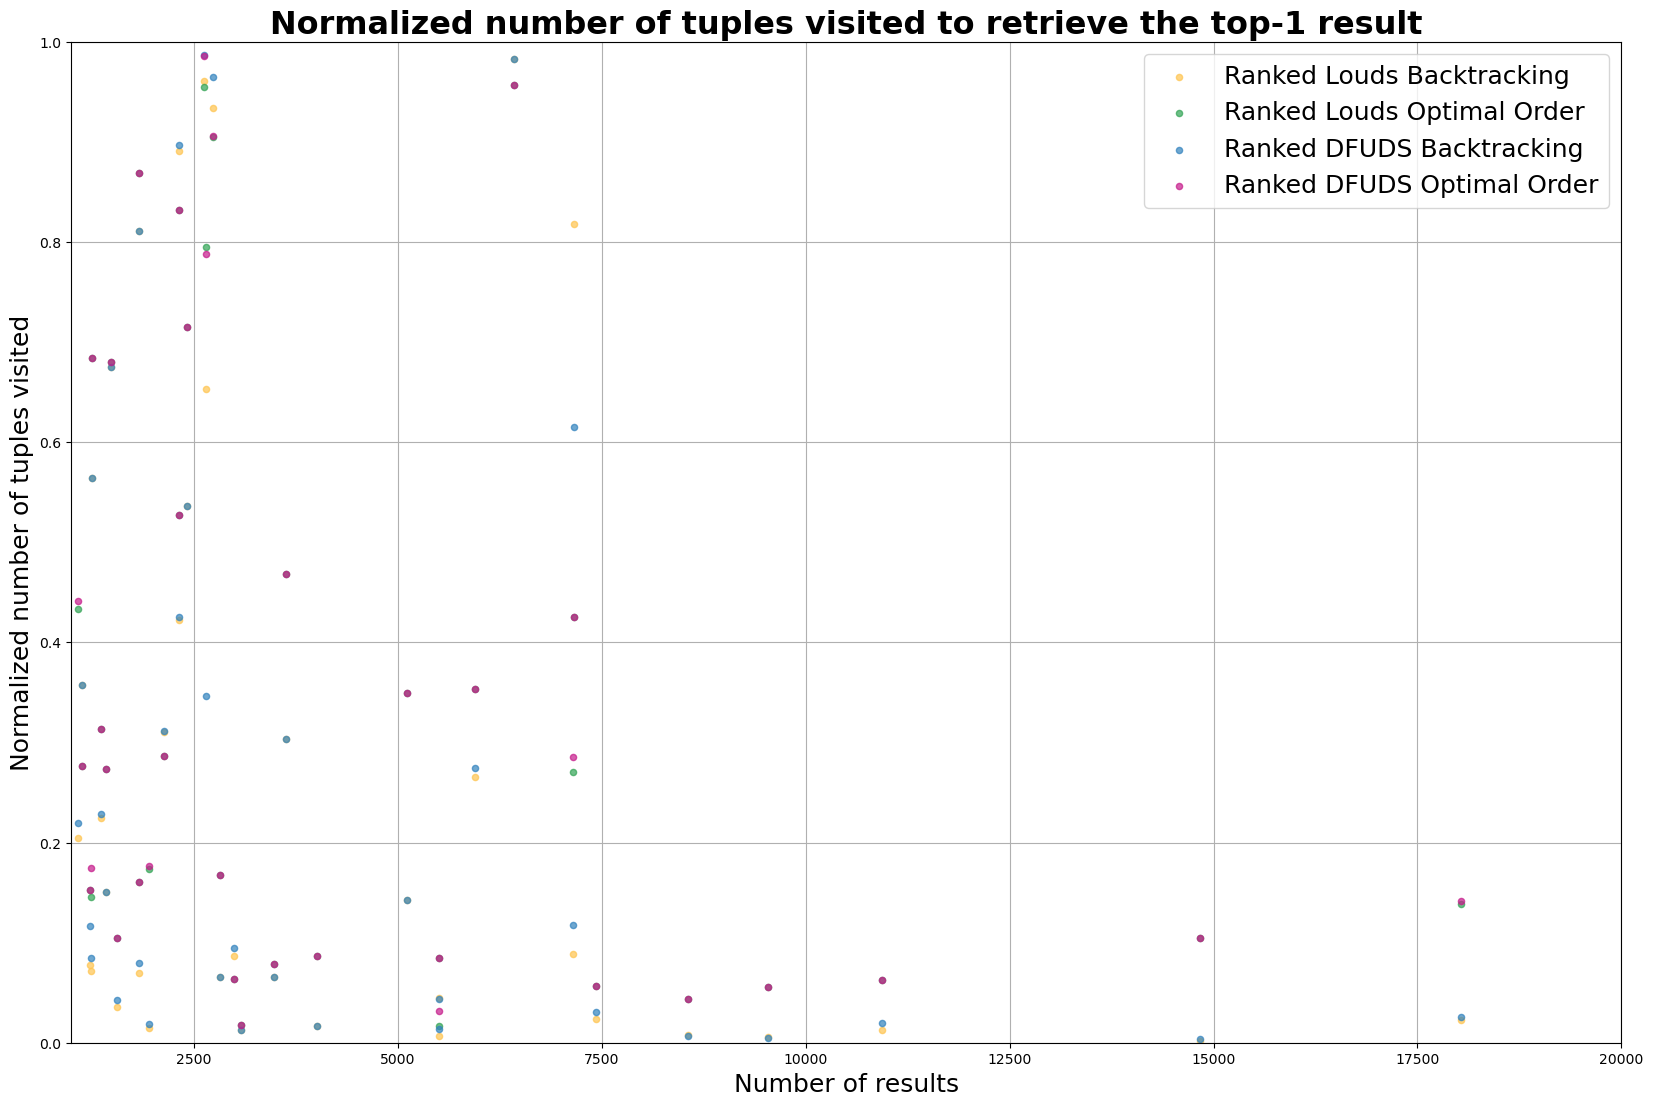

In [12]:
# Create the scatter plot
plt.figure(figsize=(20, 13))

# Plot each algorithm with its corresponding color
for algo, values in data.items():
    plt.scatter(number_res, values, label=labels[algo], color=colors[algo], alpha=0.7, s=20)


#plt.xlim(800,600000)
plt.xlim(1000,20000)
plt.ylim(0,1)
# Labels and title
plt.xlabel("Number of results",fontsize=18)
plt.ylabel("Normalized number of tuples visited",fontsize=18)
plt.title("Normalized number of tuples visited to retrieve the top-1 result",fontsize=23, fontweight='bold')
plt.legend(fontsize=18)
plt.grid(True)

#plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/scatter_plot_ranked-nodes.pdf')
plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/scatter_plot_ranked-nodes-zoom.pdf')

# Show the plot
plt.show()